all_subcarriers: [-114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101
 -100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73
  -72  -71  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59
  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45
  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31
  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17
  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3
   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   37   38   39
   40   41   42   43   44   45   46   47   48   49   50   51   52   53
   54   55   56   57   58   59   60   61   62   63   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   79

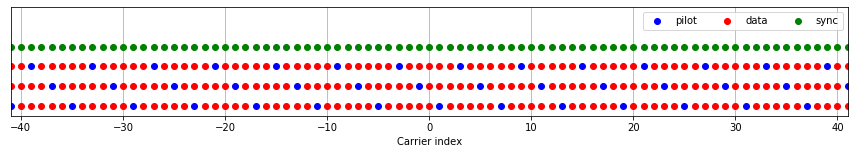

In [259]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

number_of_subcarriers = 229 # 229 // 6
scale = 6 # scale for decrease number of view subcarriers for plot

half_subcarriers = (number_of_subcarriers-1) // 2
view_plot_subcarriers = ((half_subcarriers * 2) // scale) + 1

cycle_prefix = number_of_subcarriers // 4   # 25% of the OFDM block
pilot_value = np.array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0], int)

all_subcarriers = np.arange(-half_subcarriers, half_subcarriers+1)

# First block OFDM
pilot_subcarriers = all_subcarriers[3::6]
del_range = np.arange(3, (half_subcarriers * 2), 6)
data_subcarriers = np.delete(all_subcarriers, del_range)

print("all_subcarriers: %s" % all_subcarriers, end='\n\n')
print("pilot_subcarriers: %s" % pilot_subcarriers)
print("data_subcarriers: %s" % data_subcarriers, end='\n\n')

plt.figure(figsize=(15, 2))
plt.plot(pilot_subcarriers, np.zeros_like(pilot_subcarriers)+4, 'bo', label = 'pilot')
plt.plot(data_subcarriers, np.zeros_like(data_subcarriers)+4, 'ro', label = 'data')

# Second block OFDM
pilot_subcarriers_2 = all_subcarriers[5::6]
del_range_2 = np.arange(5, (half_subcarriers * 2), 6)
data_subcarriers_2 = np.delete(all_subcarriers, del_range_2)

print("pilot_subcarriers_2: %s" % pilot_subcarriers_2)
print("data_subcarriers_2: %s" % data_subcarriers_2, end='\n\n')

plt.plot(pilot_subcarriers_2, np.zeros_like(pilot_subcarriers_2)+2, 'bo')
plt.plot(data_subcarriers_2, np.zeros_like(data_subcarriers_2)+2, 'ro')

# Third block OFDM
pilot_subcarriers_3 = all_subcarriers[1::6]
del_range_3 = np.arange(1, (half_subcarriers * 2), 6)
data_subcarriers_3 = np.delete(all_subcarriers, del_range_3)

print("pilot_subcarriers_3: %s" % pilot_subcarriers_3)
print("data_subcarriers_3: %s" % data_subcarriers_3, end='\n\n')

plt.plot(pilot_subcarriers_3, np.zeros_like(pilot_subcarriers_3), 'bo')
plt.plot(data_subcarriers_3, np.zeros_like(data_subcarriers_3), 'ro')

plt.plot(all_subcarriers, np.zeros_like(all_subcarriers)+6, 'go', label = 'sync')

plt.legend(fontsize=10, ncol=3)
plt.xlim((-view_plot_subcarriers-2, view_plot_subcarriers+2)); plt.ylim((-1, 10))
plt.xlabel('Carrier index')
plt.yticks([])
plt.grid(True)
plt.savefig("Carrier pilot data sync.png")
plt.show()

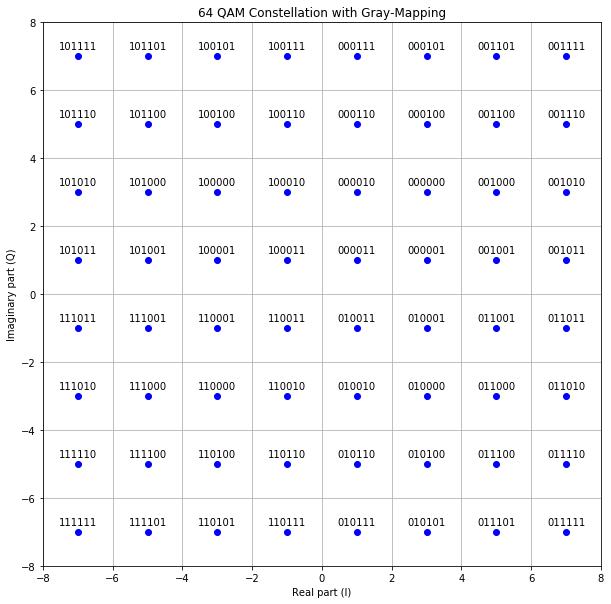

In [260]:
mu = 6 # bits per symbol (i.e. 64QAM)
payloadBits_per_OFDM = len(data_subcarriers)*mu  # number of payload bits per OFDM symbol

mapping_table = {
    (0,0,0,0,0,0) :  3 + 3j,
    (0,0,0,0,0,1) :  3 + 1j,
    (0,0,0,0,1,0) :  1 + 3j,
    (0,0,0,0,1,1) :  1 + 1j,
    (0,0,0,1,0,0) :  3 + 5j,
    (0,0,0,1,0,1) :  3 + 7j,
    (0,0,0,1,1,0) :  1 + 5j,
    (0,0,0,1,1,1) :  1 + 7j,
    (0,0,1,0,0,0) :  5 + 3j,
    (0,0,1,0,0,1) :  5 + 1j,
    (0,0,1,0,1,0) :  7 + 3j,
    (0,0,1,0,1,1) :  7 + 1j,
    (0,0,1,1,0,0) :  5 + 5j,
    (0,0,1,1,0,1) :  5 + 7j,
    (0,0,1,1,1,0) :  7 + 5j,
    (0,0,1,1,1,1) :  7 + 7j,
    (0,1,0,0,0,0) :  3 - 3j,
    (0,1,0,0,0,1) :  3 - 1j,
    (0,1,0,0,1,0) :  1 - 3j,
    (0,1,0,0,1,1) :  1 - 1j,
    (0,1,0,1,0,0) :  3 - 5j,
    (0,1,0,1,0,1) :  3 - 7j,
    (0,1,0,1,1,0) :  1 - 5j,
    (0,1,0,1,1,1) :  1 - 7j,
    (0,1,1,0,0,0) :  5 - 3j,
    (0,1,1,0,0,1) :  5 - 1j,
    (0,1,1,0,1,0) :  7 - 3j,
    (0,1,1,0,1,1) :  7 - 1j,
    (0,1,1,1,0,0) :  5 - 5j,
    (0,1,1,1,0,1) :  5 - 7j,
    (0,1,1,1,1,0) :  7 - 5j,
    (0,1,1,1,1,1) :  7 - 7j, 
    
    (1,0,0,0,0,0) :  -3 + 3j,
    (1,0,0,0,0,1) :  -3 + 1j,
    (1,0,0,0,1,0) :  -1 + 3j,
    (1,0,0,0,1,1) :  -1 + 1j,
    (1,0,0,1,0,0) :  -3 + 5j,
    (1,0,0,1,0,1) :  -3 + 7j,
    (1,0,0,1,1,0) :  -1 + 5j,
    (1,0,0,1,1,1) :  -1 + 7j,
    (1,0,1,0,0,0) :  -5 + 3j,
    (1,0,1,0,0,1) :  -5 + 1j,
    (1,0,1,0,1,0) :  -7 + 3j,
    (1,0,1,0,1,1) :  -7 + 1j,
    (1,0,1,1,0,0) :  -5 + 5j,
    (1,0,1,1,0,1) :  -5 + 7j,
    (1,0,1,1,1,0) :  -7 + 5j,
    (1,0,1,1,1,1) :  -7 + 7j,
    (1,1,0,0,0,0) :  -3 - 3j,
    (1,1,0,0,0,1) :  -3 - 1j,
    (1,1,0,0,1,0) :  -1 - 3j,
    (1,1,0,0,1,1) :  -1 - 1j,
    (1,1,0,1,0,0) :  -3 - 5j,
    (1,1,0,1,0,1) :  -3 - 7j,
    (1,1,0,1,1,0) :  -1 - 5j,
    (1,1,0,1,1,1) :  -1 - 7j,
    (1,1,1,0,0,0) :  -5 - 3j,
    (1,1,1,0,0,1) :  -5 - 1j,
    (1,1,1,0,1,0) :  -7 - 3j,
    (1,1,1,0,1,1) :  -7 - 1j,
    (1,1,1,1,0,0) :  -5 - 5j,
    (1,1,1,1,0,1) :  -5 - 7j,
    (1,1,1,1,1,0) :  -7 - 5j,
    (1,1,1,1,1,1) :  -7 - 7j   
}

plt.figure(figsize=(10, 10))
plt.xlim((-8, 8)); plt.ylim((-8, 8))
plt.yscale('linear')
plt.xlabel('Real part (I)')
plt.ylabel('Imaginary part (Q)')
plt.title('64 QAM Constellation with Gray-Mapping')
plt.savefig("64 QAM Constellation with Gray-Mapping.png")

for b5 in [0, 1]:
    for b4 in [0, 1]:
        for b3 in [0, 1]:
            for b2 in [0, 1]:
                for b1 in [0, 1]:
                    for b0 in [0, 1]:
                        B = (b5, b4 ,b3, b2, b1, b0)
                        Q = mapping_table[B]
                        plt.grid(True)
                        plt.plot(Q.real, Q.imag, 'bo')
                        plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

In [261]:
demapping_table = {v : k for k, v in mapping_table.items()}
print(demapping_table)

channel_response = np.array([1, 0, 0.3+0.3j]) # the impulse response of the wireless channel
H_exact = np.fft.fft(channel_response, number_of_subcarriers)

SNRdb = 30 # signal to noise-ratio in dB at the receiver

{(3+3j): (0, 0, 0, 0, 0, 0), (3+1j): (0, 0, 0, 0, 0, 1), (1+3j): (0, 0, 0, 0, 1, 0), (1+1j): (0, 0, 0, 0, 1, 1), (3+5j): (0, 0, 0, 1, 0, 0), (3+7j): (0, 0, 0, 1, 0, 1), (1+5j): (0, 0, 0, 1, 1, 0), (1+7j): (0, 0, 0, 1, 1, 1), (5+3j): (0, 0, 1, 0, 0, 0), (5+1j): (0, 0, 1, 0, 0, 1), (7+3j): (0, 0, 1, 0, 1, 0), (7+1j): (0, 0, 1, 0, 1, 1), (5+5j): (0, 0, 1, 1, 0, 0), (5+7j): (0, 0, 1, 1, 0, 1), (7+5j): (0, 0, 1, 1, 1, 0), (7+7j): (0, 0, 1, 1, 1, 1), (3-3j): (0, 1, 0, 0, 0, 0), (3-1j): (0, 1, 0, 0, 0, 1), (1-3j): (0, 1, 0, 0, 1, 0), (1-1j): (0, 1, 0, 0, 1, 1), (3-5j): (0, 1, 0, 1, 0, 0), (3-7j): (0, 1, 0, 1, 0, 1), (1-5j): (0, 1, 0, 1, 1, 0), (1-7j): (0, 1, 0, 1, 1, 1), (5-3j): (0, 1, 1, 0, 0, 0), (5-1j): (0, 1, 1, 0, 0, 1), (7-3j): (0, 1, 1, 0, 1, 0), (7-1j): (0, 1, 1, 0, 1, 1), (5-5j): (0, 1, 1, 1, 0, 0), (5-7j): (0, 1, 1, 1, 0, 1), (7-5j): (0, 1, 1, 1, 1, 0), (7-7j): (0, 1, 1, 1, 1, 1), (-3+3j): (1, 0, 0, 0, 0, 0), (-3+1j): (1, 0, 0, 0, 0, 1), (-1+3j): (1, 0, 0, 0, 1, 0), (-1+1j): (1, 0, 

In [262]:
def SP(bits):
    return bits.reshape((len(data_subcarriers), mu))

def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])

def OFDM_symbol(QAM_payload):
    #symbol = np.zeros(all_subcarriers, dtype=complex) # the overall K subcarriers
    symbol = np.zeros(number_of_subcarriers, dtype=complex) # the overall K subcarriers
    symbol[pilot_subcarriers] = pilot_qam_insert  # allocate the pilot subcarriers
    symbol[data_subcarriers] = QAM_payload  # allocate the pilot subcarriers
    return symbol

def IDFT(OFDM_data):
    return np.fft.ifft(OFDM_data)

def addCP(OFDM_time):
    cp = OFDM_time[-cycle_prefix:]               # take the last CP samples ...
    return np.hstack([cp, OFDM_time])  # ... and add them to the beginning

def channel(signal):
    convolved = np.convolve(signal, channel_response)
    signal_power = np.mean(abs(convolved**2))
    sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR

    # Generate complex noise with given variance
    noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
    return convolved + noise

def removeCP(signal):
    return signal[cycle_prefix:(cycle_prefix + number_of_subcarriers)]

def DFT(OFDM_RX):
    return np.fft.fft(OFDM_RX)

def channelEstimate(OFDM_demod):
    pilots = OFDM_demod[pilot_subcarriers]  # extract the pilot values from the RX signal
    Hest_at_pilots = pilots / pilot_qam_insert # divide by the transmitted pilot values
    print(Hest_at_pilots)
    # Perform interpolation between the pilot carriers to get an estimate
    # of the channel in the data carriers. Here, we interpolate absolute value and phase
    # separately
    Hest_abs = scipy.interpolate.interp1d(pilot_subcarriers, abs(Hest_at_pilots), kind='linear', fill_value="extrapolate")(all_subcarriers)
    Hest_phase = scipy.interpolate.interp1d(pilot_subcarriers, np.angle(Hest_at_pilots), kind='linear', fill_value="extrapolate")(all_subcarriers)
    Hest = Hest_abs * np.exp(1j*Hest_phase)

    plt.figure(figsize=(8,8))
    plt.plot(all_subcarriers, abs(H_exact), label='Correct Channel')
    plt.stem(pilot_subcarriers, abs(Hest_at_pilots), label='Pilot estimates')
    plt.plot(all_subcarriers, abs(Hest), label='Estimated channel via interpolation')
    plt.grid(True); plt.xlabel('Carrier index'); plt.ylabel('$|H(f)|$'); plt.legend(fontsize=10)
    plt.ylim(0,2)

    return Hest

def equalize(OFDM_demod, Hest):
    return OFDM_demod / Hest

def get_payload(equalized):
    return equalized[data_subcarriers]

def Demapping(QAM):
    # array of possible constellation points
    constellation = np.array([x for x in demapping_table.keys()])

    # calculate distance of each RX point to each possible point
    dists = abs(QAM.reshape((-1,1)) - constellation.reshape((1,-1)))

    # for each element in QAM, choose the index in constellation
    # that belongs to the nearest constellation point
    const_index = dists.argmin(axis=1)

    # get back the real constellation point
    hardDecision = constellation[const_index]

    # transform the constellation point into the bit groups
    return np.vstack([demapping_table[C] for C in hardDecision]), hardDecision

def PS(bits):
    return bits.reshape((-1,))

In [263]:
bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
bits_SP = SP(bits)
print("bit groups")
print(bits_SP[:, :])

bit groups
[[0 0 1 0 1 0]
 [0 1 1 0 0 1]
 [1 1 0 0 1 0]
 ...
 [0 0 1 0 1 1]
 [1 0 0 0 0 0]
 [0 1 0 1 0 1]]


In [264]:
QAM = Mapping(bits_SP)

pilot_value_SP = np.reshape(pilot_value, (len(pilot_value)//mu, mu))
print(pilot_value)
print(pilot_value_SP)

QAM_pilot = Mapping(pilot_value_SP)
print(QAM_pilot)
pilot_qam_insert = QAM_pilot[0]
print(pilot_qam_insert)
pilot_test = 3+3j
print(pilot_test)


[0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0]
[[0 1 0 1 0 1]
 [1 1 0 1 1 1]
 [1 0 0 0 1 1]
 [0 0 0 1 1 0]]
[ 3.-7.j -1.-7.j -1.+1.j  1.+5.j]
(3-7j)
(3+3j)


[1.34228823+0.21284889j 1.39387951+0.10654708j 1.43800792-0.07633333j
 1.4210747 -0.2113101j  1.31626014-0.26173239j 1.19161794-0.40628619j
 1.09865844-0.43561398j 0.97205915-0.43144777j 0.7773539 -0.39677295j
 0.68069991-0.3142919j  0.66353892-0.17447456j 0.56171828-0.0437017j
 0.56597559+0.1043474j  0.65607813+0.2068689j  0.75202539+0.35915455j
 0.82648657+0.40391508j 0.95752385+0.42517153j 1.09889803+0.38342388j
 1.19788141+0.33597314j 1.32364165+0.26975006j 1.4090901 +0.13024253j
 1.42240636-0.00991854j 1.38880491-0.14789524j 1.32160261-0.2685727j
 1.25920358-0.3464468j  1.08929418-0.43839911j 0.96913433-0.39407943j
 0.84397954-0.407103j   0.67412566-0.28329276j 0.64476473-0.18683913j
 0.59830699-0.05666625j 0.57062326+0.06005493j 0.65758047+0.18802168j
 0.69838067+0.32927797j 0.83764692+0.3844404j  0.97018429+0.42196211j
 1.12415287+0.41436206j 1.25176258+0.35562822j]
Obtained Bit error rate:  0.0


<Figure size 432x288 with 0 Axes>

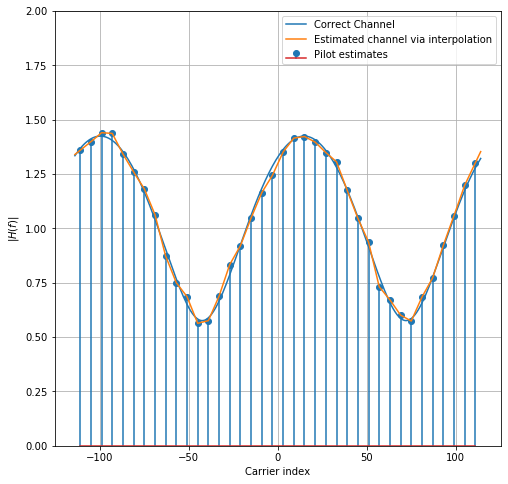

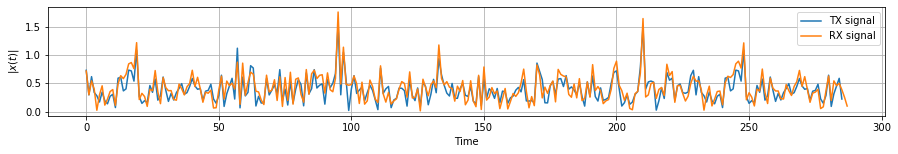

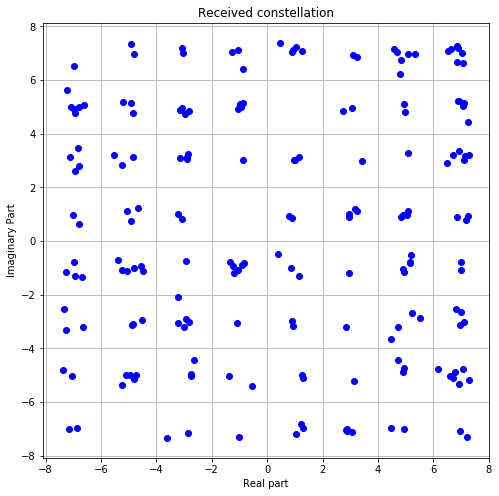

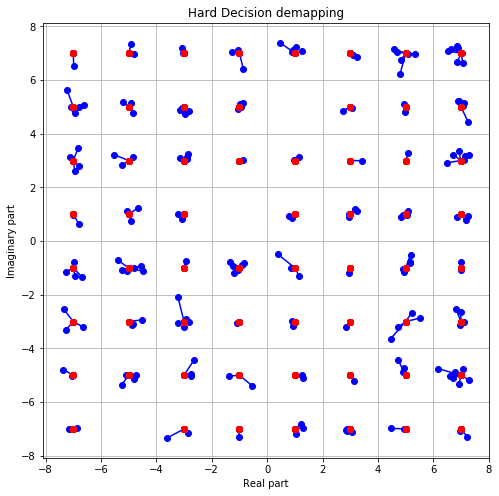

In [268]:
OFDM_data = OFDM_symbol(QAM)
OFDM_time = IDFT(OFDM_data)
OFDM_withCP = addCP(OFDM_time)
OFDM_TX = OFDM_withCP
OFDM_RX = channel(OFDM_TX)
OFDM_RX_noCP = removeCP(OFDM_RX)
OFDM_demod = DFT(OFDM_RX_noCP)
plt.figure(); Hest = channelEstimate(OFDM_demod); plt.savefig("channelEstimate.png")
equalized_Hest = equalize(OFDM_demod, Hest)
QAM_est = get_payload(equalized_Hest)
PS_est, hardDecision = Demapping(QAM_est)
bits_est = PS(PS_est)

plt.figure(figsize=(15,2))
plt.plot(abs(OFDM_TX), label='TX signal')
plt.plot(abs(OFDM_RX), label='RX signal')
plt.legend(fontsize=10)
plt.xlabel('Time'); plt.ylabel('$|x(t)|$');
plt.grid(True);
plt.savefig("Time-domainSignals.png")

plt.figure(figsize=(8,8))
plt.plot(QAM_est.real, QAM_est.imag, 'bo');
plt.grid(True); plt.xlabel('Real part'); plt.ylabel('Imaginary Part'); plt.title("Received constellation"); # il
plt.savefig("Constellation.png")

plt.figure(figsize=(8,8))
for qam, hard in zip(QAM_est, hardDecision):
    plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'b-o');
    plt.plot(hardDecision.real, hardDecision.imag, 'ro')
plt.grid(True); plt.xlabel('Real part'); plt.ylabel('Imaginary part'); plt.title('Hard Decision demapping'); # il
plt.savefig("HardDecision.png")

print ("Obtained Bit error rate: ", np.sum(abs(bits-bits_est))/len(bits))

plt.show()